# PCA - Python
# Autor: Diego Vértiz Padilla

Este análisis aplica PCA a un conjunto de datos (3 columnas/dimensiones)
Se centran los datos,se calcula la matriz de covarianza y correlación, y se determina cuántos componentes son necesarios para explicar al menos el 95% de la varianza.

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("indicadores_datos.csv")
X = df.select_dtypes(include=[np.number])

In [3]:
X_centered = X - X.mean()

In [4]:
pca = PCA()
X_pca = pca.fit_transform(X_centered)

In [5]:
explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)
print("Varianza explicada:", explained)
print("Varianza acumulada:", cum_explained)

Varianza explicada: [0.71415681 0.22142035 0.06442284]
Varianza acumulada: [0.71415681 0.93557716 1.        ]


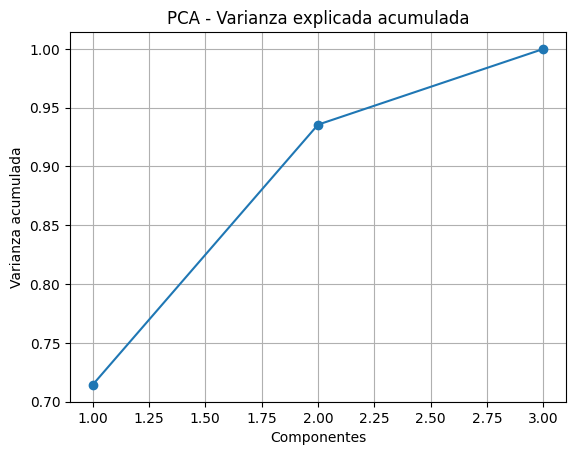

In [6]:
plt.plot(range(1, len(explained)+1), cum_explained, marker='o')
plt.title("PCA - Varianza explicada acumulada")
plt.xlabel("Componentes")
plt.ylabel("Varianza acumulada")
plt.grid(True)
plt.show()

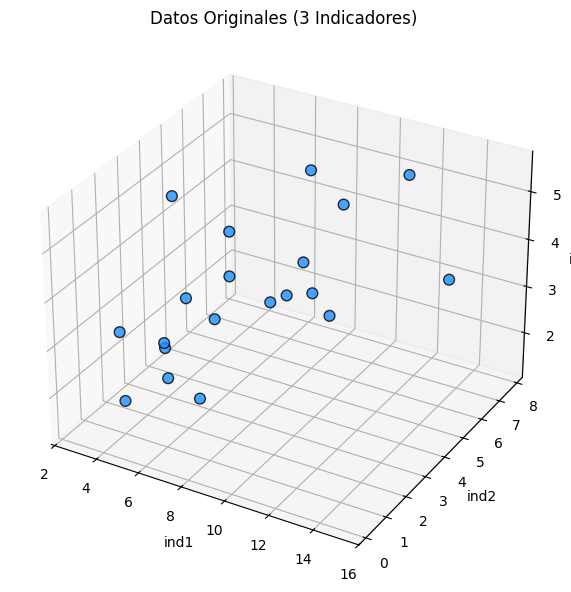

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# Extraer directamente las 3 columnas numéricas 
X_raw = X.values  

# 3D scatter plot de los datos 
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_raw[:, 0], X_raw[:, 1], X_raw[:, 2],
    c='dodgerblue', edgecolors='k', s=60, alpha=0.8
)

ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.set_zlabel(X.columns[2])
ax.set_title("Datos Originales (3 Indicadores)")
plt.tight_layout()
plt.show()

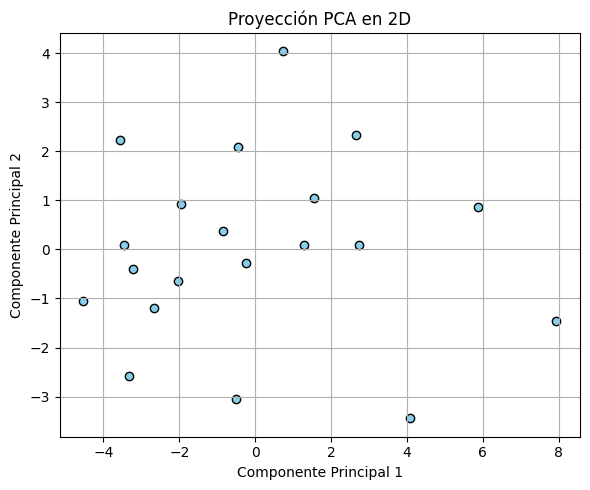

In [8]:
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='skyblue', edgecolors='k')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Proyección PCA en 2D")
plt.grid(True)
plt.tight_layout()
plt.show()